# Keras Regression Code Along Project

Let's now apply our knowledge to a more realistic data set. Here we will also focus on feature engineering and cleaning our data!

## The Data

We will be using data from a Kaggle data set:

https://www.kaggle.com/harlfoxem/housesalesprediction

#### Feature Columns
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

#### The problem
* Develop a neural network model to predict the house price based on the above features.

In [ ]:
#
# Your code to import libraries, numpy, pandas, matplotlib,  seaborn
#
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Settings for plots
%matplotlib inline

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Your code to read the data from the file provided.
df = pd.read_csv('kc_house_data.csv')

# Exploratory Data Analysis

Perform some data analysis using the libraries above.
Visualise the features to understand the problem and use the appropriate features for the model.

In [ ]:
# Your code to check if any null value is present in the dataset. Hint - use isnull() in pandas
print(df.isnull().sum())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [ ]:
# Your code to describe the dataset to get imortant properties of it.
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Let's see how price columns look like i.e. how prices are distributed.

<Axes: xlabel='price', ylabel='Density'>

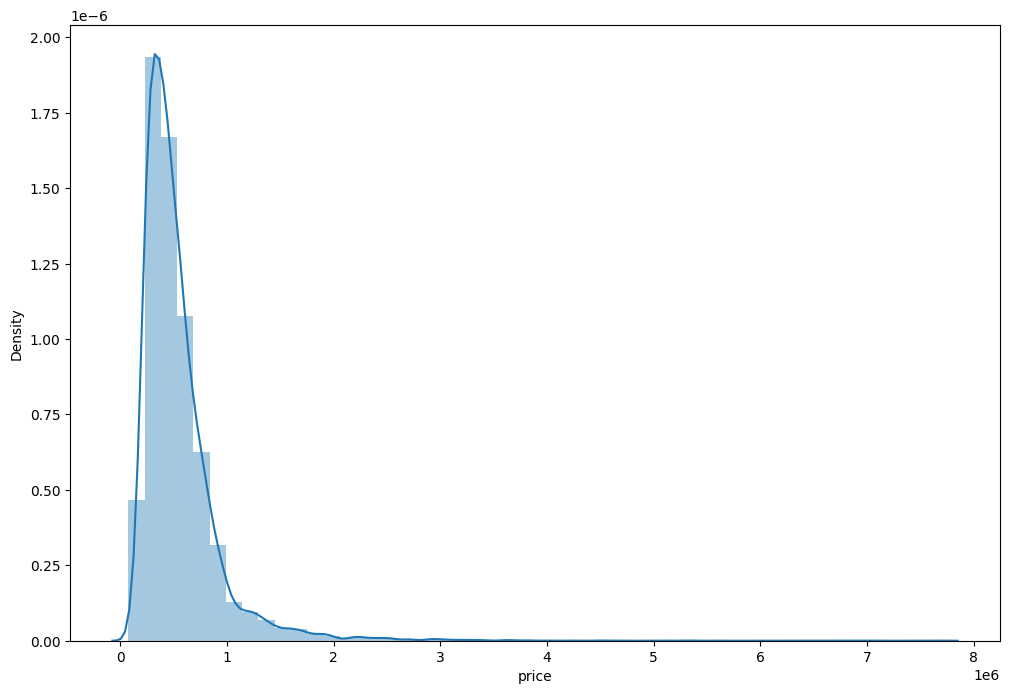

In [ ]:
plt.figure(figsize=(12,8))
sns.distplot(df['price'])

#### Let's look at the columns - number of bedroom in more detail
#### Write code to plot the numbers of bedrooms and the number of times they appear in the data.  
####The x-axis contains the number of bedrroms and the y axis will portray the number of times the particular bedroom appears in the column.

#### Hint - use sns.countplot.  

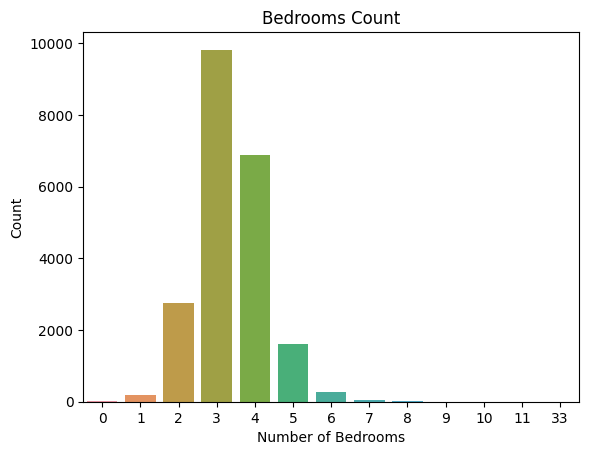

In [ ]:
# Your code to plot number of bedrooms and their counts
bed_counts = df['bedrooms'].value_counts()

sns.barplot(x=bed_counts.index, y=bed_counts)

plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')
plt.title('Bedrooms Count')

plt.show()

# Plot a scatter plot between the price and sqft_living column.

In [ ]:
# You code to visualize an scatter plot.

<Axes: xlabel='bedrooms', ylabel='price'>

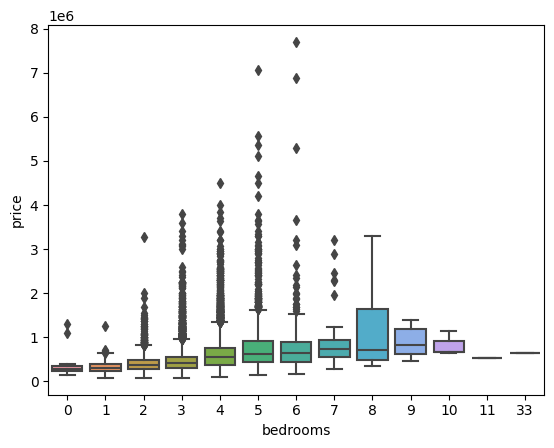

In [ ]:
sns.boxplot(x='bedrooms',y='price',data=df)

### Geographical Properties

Visulaize an scatter plot between price and longitude (long) and latidtude (lat)  columns.



<Axes: xlabel='long', ylabel='price'>

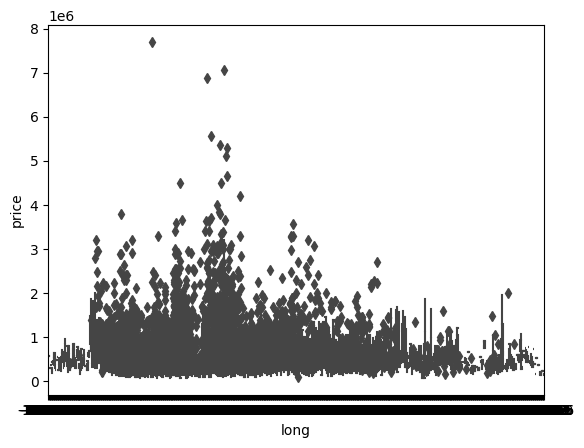

In [ ]:
# Your code to visualize an scatter plot between price and longitude (long) column.
sns.boxplot(x='long',y='price',data=df)

In [ ]:
# Your code to visualize an scatter plot between price and latitude(lat) column.

<Axes: xlabel='long', ylabel='lat'>

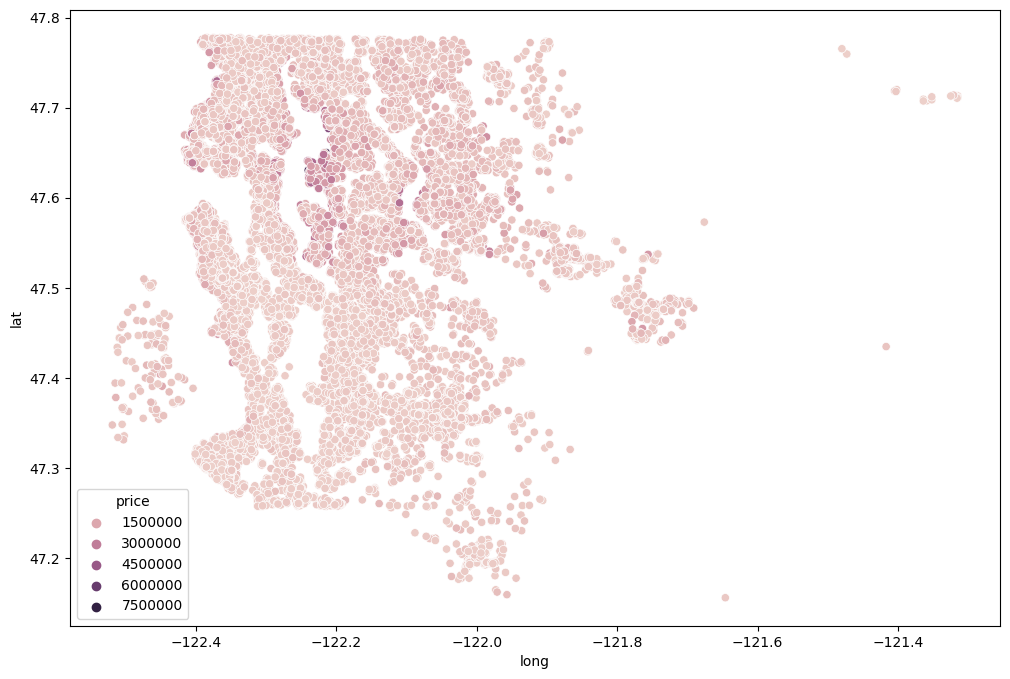

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x = 'long', y = 'lat', data = df, hue = 'price')

# Sort the values in the dataframe according to price and print first few rows.

In [ ]:
# Your code to sort data frame according to the price (ascending order) and see first few rows.
# Hint - Use df.sort_values and combine it with head()
df = df.sort_values(by='price', ascending=True)

print(df.head())

               id             date    price  bedrooms  bathrooms  sqft_living  \
1149   3421079032  20150217T000000  75000.0         1       0.00          670   
15293    40000362  20140506T000000  78000.0         2       1.00          780   
465    8658300340  20140523T000000  80000.0         1       0.75          430   
16198  3028200080  20150324T000000  81000.0         2       1.00          730   
8274   3883800011  20141105T000000  82000.0         3       1.00          860   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
1149      43377     1.0           0     0  ...      3         670   
15293     16344     1.0           0     0  ...      5         780   
465        5050     1.0           0     0  ...      4         430   
16198      9975     1.0           0     0  ...      5         730   
8274      10426     1.0           0     0  ...      6         860   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
1149               0   

#### The following code visualizes the price intensity with the latitude and longitude for 1% and 99% of the data separately.

#### You need to add comment on each line of the code.

In [ ]:
len(df)*(0.01)

216.13

In [ ]:
non_top_1_perc = df.sort_values('price',ascending=False).iloc[216:]
non_top_1_perc

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3281,8964800025,20150226T000000,1965000.0,5,3.75,3940,13738,1.5,0,3,...,9,3940,0,1951,0,98004,47.6203,-122.212,2370,13320
12577,2806300065,20150422T000000,1960000.0,4,4.00,4430,31353,2.0,0,0,...,12,4430,0,1998,0,98005,47.6422,-122.157,3900,35237
12283,1923000260,20141015T000000,1959000.0,5,4.50,6200,23373,3.0,0,1,...,11,5050,1150,1988,0,98040,47.5632,-122.215,3700,14486
1152,4055701200,20150421T000000,1955000.0,4,2.75,3120,7898,1.0,1,4,...,8,1560,1560,1963,0,98034,47.7165,-122.259,2630,13868
9175,3124059023,20150213T000000,1955000.0,3,1.75,3330,12566,1.0,1,4,...,8,1940,1390,1960,0,98040,47.5287,-122.220,3730,16560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8274,3883800011,20141105T000000,82000.0,3,1.00,860,10426,1.0,0,0,...,6,860,0,1954,0,98146,47.4987,-122.341,1140,11250
16198,3028200080,20150324T000000,81000.0,2,1.00,730,9975,1.0,0,0,...,5,730,0,1943,0,98168,47.4808,-122.315,860,9000
465,8658300340,20140523T000000,80000.0,1,0.75,430,5050,1.0,0,0,...,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500
15293,40000362,20140506T000000,78000.0,2,1.00,780,16344,1.0,0,0,...,5,780,0,1942,0,98168,47.4739,-122.280,1700,10387


<Axes: xlabel='long', ylabel='lat'>

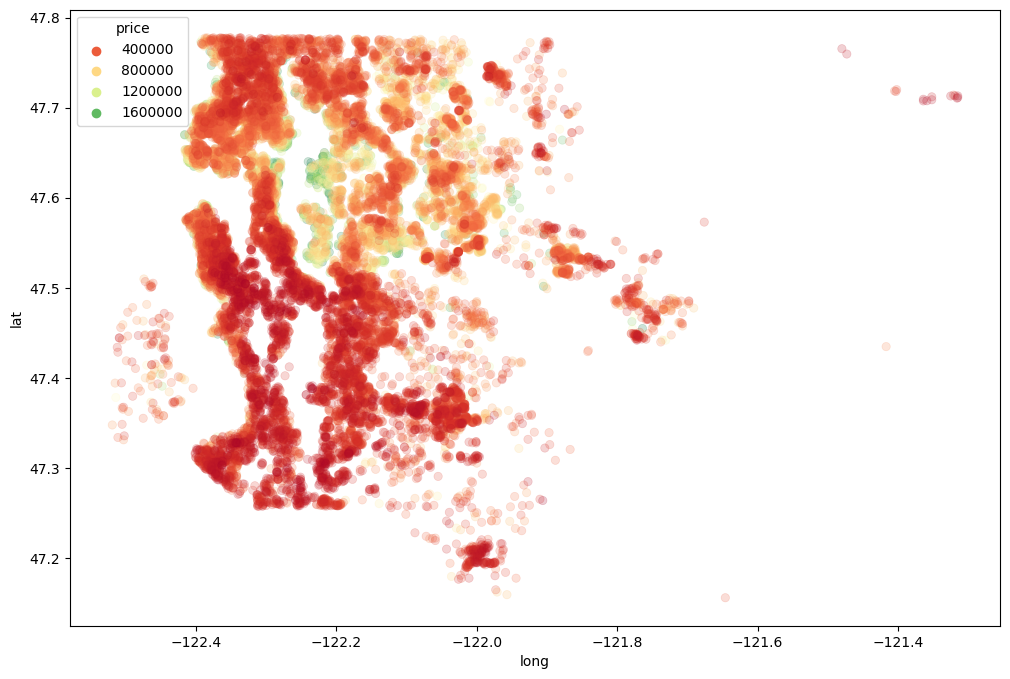

In [ ]:
plt.figure(figsize=(12,8))

sns.scatterplot(x='long',y='lat',
                data=non_top_1_perc,hue='price',
                palette='RdYlGn',edgecolor=None,alpha=0.2)

### Other Features
# Let's have a box plot between waterfront and price.

# Explain what box plot is doing?

<Axes: xlabel='waterfront', ylabel='price'>

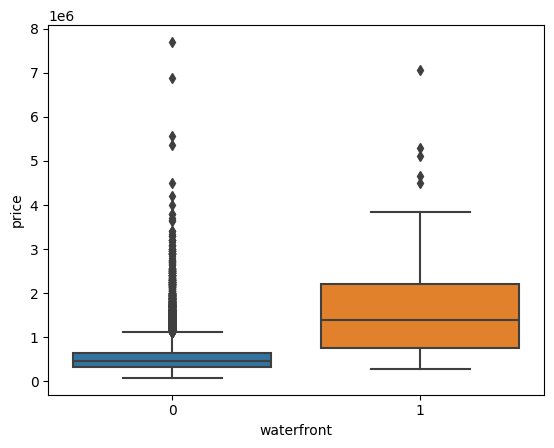

In [ ]:
sns.boxplot(x='waterfront',y='price',data=df)

## Working with Feature Data

In [ ]:
# Your code to print first few rows of the data.
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1149,3421079032,20150217T000000,75000.0,1,0.00,670,43377,1.0,0,0,...,3,670,0,1966,0,98022,47.2638,-121.906,1160,42882
15293,40000362,20140506T000000,78000.0,2,1.00,780,16344,1.0,0,0,...,5,780,0,1942,0,98168,47.4739,-122.280,1700,10387
465,8658300340,20140523T000000,80000.0,1,0.75,430,5050,1.0,0,0,...,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500
16198,3028200080,20150324T000000,81000.0,2,1.00,730,9975,1.0,0,0,...,5,730,0,1943,0,98168,47.4808,-122.315,860,9000
8274,3883800011,20141105T000000,82000.0,3,1.00,860,10426,1.0,0,0,...,6,860,0,1954,0,98146,47.4987,-122.341,1140,11250
2141,1623049041,20140508T000000,82500.0,2,1.00,520,22334,1.0,0,0,...,5,520,0,1951,0,98168,47.4799,-122.296,1572,10570
18468,7999600180,20140529T000000,83000.0,2,1.00,900,8580,1.0,0,0,...,5,900,0,1918,0,98168,47.4727,-122.270,2060,6533
3767,1523049188,20150430T000000,84000.0,2,1.00,700,20130,1.0,0,0,...,6,700,0,1949,0,98168,47.4752,-122.271,1490,18630
16714,1322049150,20150305T000000,85000.0,2,1.00,910,9753,1.0,0,0,...,5,910,0,1947,0,98032,47.3897,-122.236,1160,7405
10253,2422049104,20140915T000000,85000.0,2,1.00,830,9000,1.0,0,0,...,6,830,0,1939,0,98032,47.3813,-122.243,1160,7680


In [ ]:
# Your code to print info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 1149 to 7252
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long

Following code is dropping the column ID.

Question - why are dropping this column?

In [ ]:
df = df.drop('id',axis=1)

### Feature Engineering from Date

Transform the features into useful formats to apply appropriate Deep NN technique!

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].apply(lambda date:date.month)
df['year'] = df['date'].apply(lambda date:date.year)
#df['year'] = df['date'].apply(lambda date:date.year)

# Your code to check what above code is doing.
print("\nDate:\n",df['date'])
print("\nMonth:\n",df['month'])
print("\nYear:\n",df['year'])


Date:
 1149    2015-02-17
15293   2014-05-06
465     2014-05-23
16198   2015-03-24
8274    2014-11-05
           ...    
1448    2015-04-13
4411    2014-08-04
9254    2014-09-19
3914    2014-06-11
7252    2014-10-13
Name: date, Length: 21613, dtype: datetime64[ns]

Month:
 1149      2
15293     5
465       5
16198     3
8274     11
         ..
1448      4
4411      8
9254      9
3914      6
7252     10
Name: month, Length: 21613, dtype: int64

Year:
 1149     2015
15293    2014
465      2014
16198    2015
8274     2014
         ... 
1448     2015
4411     2014
9254     2014
3914     2014
7252     2014
Name: year, Length: 21613, dtype: int64


<Axes: xlabel='year', ylabel='price'>

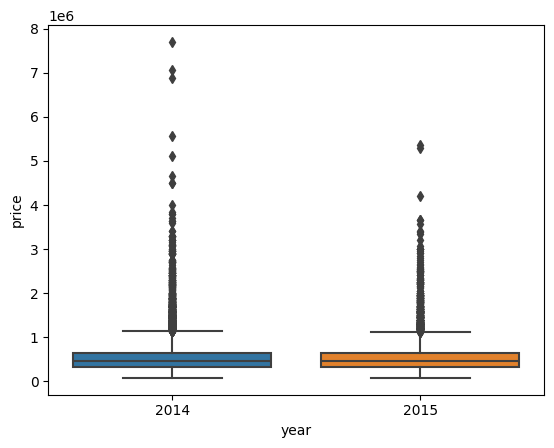

In [ ]:
sns.boxplot(x='year',y='price',data=df)

<Axes: xlabel='month', ylabel='price'>

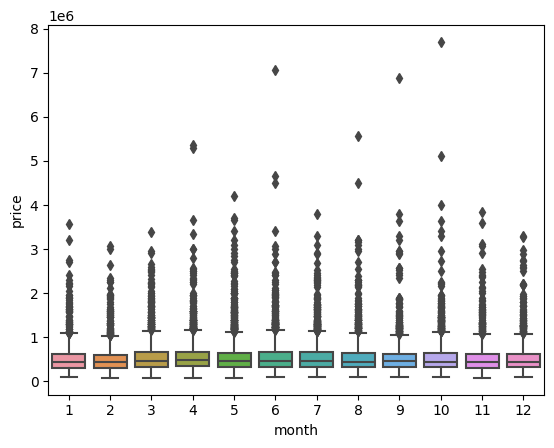

In [ ]:
# Your code to visualize boxplot between month and price
sns.boxplot(x='month',y='price',data=df)

In [ ]:
# we do not need the 'date' column anymore

df = df.drop('date',axis=1)

In [ ]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month', 'year'],
      dtype='object')

In [ ]:
df['zipcode'].value_counts()

98103    602
98038    590
98115    583
98052    574
98117    553
        ... 
98102    105
98010    100
98024     81
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

Should we remove zipcode?  If so, remove it.

In [ ]:
# Your code to remove zip code - Hint - Use df.drop
# Your code to remove 'date' column.
df = df.drop('zipcode',axis=1)

In [ ]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
1149,75000.0,1,0.00,670,43377,1.0,0,0,3,3,670,0,1966,0,47.2638,-121.906,1160,42882,2,2015
15293,78000.0,2,1.00,780,16344,1.0,0,0,1,5,780,0,1942,0,47.4739,-122.280,1700,10387,5,2014
465,80000.0,1,0.75,430,5050,1.0,0,0,2,4,430,0,1912,0,47.6499,-121.909,1200,7500,5,2014
16198,81000.0,2,1.00,730,9975,1.0,0,0,1,5,730,0,1943,0,47.4808,-122.315,860,9000,3,2015
8274,82000.0,3,1.00,860,10426,1.0,0,0,3,6,860,0,1954,0,47.4987,-122.341,1140,11250,11,2014


In [ ]:
# could make sense due to scaling, higher should correlate to more value
df['yr_renovated'].value_counts()

0       20699
2014       91
2013       37
2003       36
2000       35
        ...  
1944        1
1951        1
1948        1
1959        1
1954        1
Name: yr_renovated, Length: 70, dtype: int64

In [ ]:
df['sqft_basement'].value_counts()

0       13126
600       221
700       218
500       214
800       206
        ...  
207         1
516         1
283         1
556         1
3480        1
Name: sqft_basement, Length: 306, dtype: int64

## Scaling and Train Test Split

Scikit-Learn is used to split out the train-test library.

First separate input and output. Input will be stored in the variable X and output in variable y.

In [ ]:
# Your code to store all columns except price column in variable X. Hint - Use pd.drop()
# Your code to store output (price column) in variable y
X = df.drop('price', axis=1)

y = df['price']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Your code to separate X and y into X_train, X_test, y_train, y_test i.e. getting training and testing set for the model.

# You can choose your unique test data size as a percentage of the original dataset.
# It is better to consider the range from 15 to 35%

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(17290, 19) (4323, 19) (17290,) (4323,)


### Scaling

Features are scaled to be in a proper range to be useful for modeling.
Scaling converts all values between 0-1.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


fit_transform() is used on the training data so that we can scale the training data and also learn the scaling parameters of that data, such as the mean and variance of the features of the training set. These learned and fixed parameters are then used to scale our test data with the transform() function.

In [ ]:
# Your code to print shapes of X_train, X_test, y_train, y_test and see if shapes are okay.
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(17290, 19) (4323, 19) (17290,) (4323,)


## Creating a Model

Build a Deep NN model with appropriate layers using Keras.  

In [ ]:
#
# Import Libraries for Neural Network model development.
#
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow import keras
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras import Sequential


Develop your own Neural Network model with suitable number of input, output, and any number of hidden layers. Since we are predicting a value, the number of neurons in outpit layer should be one.

In [ ]:
#
# Your code to build MLP neural network model.
#
print(X_train.shape)

(17290, 19)


In [ ]:
model = Sequential()

# input layer
model.add(Dense(19,activation='relu'))

# hidden layers
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))

# output layer
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [ ]:
model1 = Sequential()

# input layer
model1.add(Dense(152,activation='relu'))

# hidden layers
model1.add(Dense(114,activation='relu'))
model1.add(Dense(76,activation='relu'))
model1.add(Dense(19,activation='relu'))

# output layer
model1.add(Dense(1))

model1.compile(optimizer='adam',loss='mse')

## Training the Model

Write the code to train the neural network model. Use the following of your choice:



1.   Optimization method
2.   Batch size
3.   Number of epochs.

Test for various optimizers and check which one performs better in terms of loss function = 'mse'.

Use following APIs
* https://keras.io/api/optimizers/
* https://keras.io/api/losses/regression_losses/
* https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics
* https://keras.io/api/models/model_training_apis/



In [ ]:
# ! add your chosen optimiser !

model.compile(optimizer='adam',loss='mse')

In [ ]:
#
# Your code to train the model.
#
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400)


Epoch 1/400
136/136 [==============================] - 0s 1ms/step - loss: 15954002944.0000 - val_loss: 22024738816.0000
Epoch 2/400
136/136 [==============================] - 0s 1ms/step - loss: 15972726784.0000 - val_loss: 21860341760.0000
Epoch 3/400
136/136 [==============================] - 0s 1ms/step - loss: 15984651264.0000 - val_loss: 21884614656.0000
Epoch 4/400
136/136 [==============================] - 0s 1ms/step - loss: 15961474048.0000 - val_loss: 21930745856.0000
Epoch 5/400
136/136 [==============================] - 0s 1ms/step - loss: 15952537600.0000 - val_loss: 22035384320.0000
Epoch 6/400
136/136 [==============================] - 0s 1ms/step - loss: 15913324544.0000 - val_loss: 21848401920.0000
Epoch 7/400
136/136 [==============================] - 0s 1ms/step - loss: 15916506112.0000 - val_loss: 21866455040.0000
Epoch 8/400
136/136 [==============================] - 0s 1ms/step - loss: 15924242432.0000 - val_loss: 21789863936.0000
Epoch 9/400
136/136 [===========

136/136 [==============================] - 0s 1ms/step - loss: 15578470400.0000 - val_loss: 22095276032.0000
Epoch 69/400
136/136 [==============================] - 0s 1ms/step - loss: 15536330752.0000 - val_loss: 21899452416.0000
Epoch 70/400
136/136 [==============================] - 0s 1ms/step - loss: 15523260416.0000 - val_loss: 22193207296.0000
Epoch 71/400
136/136 [==============================] - 0s 1ms/step - loss: 15702129664.0000 - val_loss: 21948825600.0000
Epoch 72/400
136/136 [==============================] - 0s 1ms/step - loss: 15559805952.0000 - val_loss: 21926107136.0000
Epoch 73/400
136/136 [==============================] - 0s 1ms/step - loss: 15523135488.0000 - val_loss: 21879173120.0000
Epoch 74/400
136/136 [==============================] - 0s 1ms/step - loss: 15492059136.0000 - val_loss: 22033387520.0000
Epoch 75/400
136/136 [==============================] - 0s 1ms/step - loss: 15506967552.0000 - val_loss: 21941299200.0000
Epoch 76/400
136/136 [===============

Epoch 135/400
136/136 [==============================] - 0s 1ms/step - loss: 15164928000.0000 - val_loss: 22172700672.0000
Epoch 136/400
136/136 [==============================] - 0s 1ms/step - loss: 15138703360.0000 - val_loss: 21916241920.0000
Epoch 137/400
136/136 [==============================] - 0s 1ms/step - loss: 15148108800.0000 - val_loss: 21733435392.0000
Epoch 138/400
136/136 [==============================] - 0s 1ms/step - loss: 15147799552.0000 - val_loss: 22385895424.0000
Epoch 139/400
136/136 [==============================] - 0s 1ms/step - loss: 15166775296.0000 - val_loss: 21874649088.0000
Epoch 140/400
136/136 [==============================] - 0s 1ms/step - loss: 15142854656.0000 - val_loss: 22003122176.0000
Epoch 141/400
136/136 [==============================] - 0s 1ms/step - loss: 15140836352.0000 - val_loss: 22126215168.0000
Epoch 142/400
136/136 [==============================] - 0s 1ms/step - loss: 15137642496.0000 - val_loss: 22136877056.0000
Epoch 143/400
13

136/136 [==============================] - 0s 1ms/step - loss: 14867430400.0000 - val_loss: 21974544384.0000
Epoch 202/400
136/136 [==============================] - 0s 1ms/step - loss: 14798630912.0000 - val_loss: 22122297344.0000
Epoch 203/400
136/136 [==============================] - 0s 1ms/step - loss: 14780678144.0000 - val_loss: 21926510592.0000
Epoch 204/400
136/136 [==============================] - 0s 1ms/step - loss: 14790547456.0000 - val_loss: 22260781056.0000
Epoch 205/400
136/136 [==============================] - 0s 1ms/step - loss: 14786433024.0000 - val_loss: 22029596672.0000
Epoch 206/400
136/136 [==============================] - 0s 1ms/step - loss: 14759794688.0000 - val_loss: 21833410560.0000
Epoch 207/400
136/136 [==============================] - 0s 1ms/step - loss: 14749501440.0000 - val_loss: 21837920256.0000
Epoch 208/400
136/136 [==============================] - 0s 1ms/step - loss: 14758866944.0000 - val_loss: 21796519936.0000
Epoch 209/400
136/136 [=======

136/136 [==============================] - 0s 1ms/step - loss: 14365280256.0000 - val_loss: 21572052992.0000
Epoch 268/400
136/136 [==============================] - 0s 1ms/step - loss: 14425537536.0000 - val_loss: 21641136128.0000
Epoch 269/400
136/136 [==============================] - 0s 1ms/step - loss: 14382519296.0000 - val_loss: 21810880512.0000
Epoch 270/400
136/136 [==============================] - 0s 1ms/step - loss: 14411126784.0000 - val_loss: 21697622016.0000
Epoch 271/400
136/136 [==============================] - 0s 1ms/step - loss: 14381092864.0000 - val_loss: 21598099456.0000
Epoch 272/400
136/136 [==============================] - 0s 1ms/step - loss: 14356459520.0000 - val_loss: 21658961920.0000
Epoch 273/400
136/136 [==============================] - 0s 1ms/step - loss: 14356457472.0000 - val_loss: 22191153152.0000
Epoch 274/400
136/136 [==============================] - 0s 1ms/step - loss: 14343841792.0000 - val_loss: 21769060352.0000
Epoch 275/400
136/136 [=======

136/136 [==============================] - 0s 1ms/step - loss: 14060448768.0000 - val_loss: 21865267200.0000
Epoch 334/400
136/136 [==============================] - 0s 1ms/step - loss: 14044748800.0000 - val_loss: 21623316480.0000
Epoch 335/400
136/136 [==============================] - 0s 1ms/step - loss: 14037000192.0000 - val_loss: 21622964224.0000
Epoch 336/400
136/136 [==============================] - 0s 1ms/step - loss: 14053018624.0000 - val_loss: 21822089216.0000
Epoch 337/400
136/136 [==============================] - 0s 1ms/step - loss: 14052242432.0000 - val_loss: 21835849728.0000
Epoch 338/400
136/136 [==============================] - 0s 1ms/step - loss: 14092403712.0000 - val_loss: 21502945280.0000
Epoch 339/400
136/136 [==============================] - 0s 1ms/step - loss: 13983559680.0000 - val_loss: 21725671424.0000
Epoch 340/400
136/136 [==============================] - 0s 1ms/step - loss: 14009401344.0000 - val_loss: 21681440768.0000
Epoch 341/400
136/136 [=======

136/136 [==============================] - 0s 1ms/step - loss: 13741113344.0000 - val_loss: 21559089152.0000
Epoch 400/400
136/136 [==============================] - 0s 1ms/step - loss: 13729910784.0000 - val_loss: 21783957504.0000


In [ ]:
#
# Your code to train the model.
#
model1.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400)

Epoch 1/400
136/136 [==============================] - 1s 2ms/step - loss: 420373430272.0000 - val_loss: 374846193664.0000
Epoch 2/400
136/136 [==============================] - 0s 1ms/step - loss: 186992558080.0000 - val_loss: 99903643648.0000
Epoch 3/400
136/136 [==============================] - 0s 1ms/step - loss: 96088858624.0000 - val_loss: 94328397824.0000
Epoch 4/400
136/136 [==============================] - 0s 1ms/step - loss: 89750134784.0000 - val_loss: 87286628352.0000
Epoch 5/400
136/136 [==============================] - 0s 1ms/step - loss: 82330722304.0000 - val_loss: 79535644672.0000
Epoch 6/400
136/136 [==============================] - 0s 1ms/step - loss: 74031120384.0000 - val_loss: 71250460672.0000
Epoch 7/400
136/136 [==============================] - 0s 1ms/step - loss: 65403453440.0000 - val_loss: 62846836736.0000
Epoch 8/400
136/136 [==============================] - 0s 1ms/step - loss: 58126204928.0000 - val_loss: 56999575552.0000
Epoch 9/400
136/136 [========

136/136 [==============================] - 0s 1ms/step - loss: 29777119232.0000 - val_loss: 31255941120.0000
Epoch 69/400
136/136 [==============================] - 0s 1ms/step - loss: 29729656832.0000 - val_loss: 31200364544.0000
Epoch 70/400
136/136 [==============================] - 0s 1ms/step - loss: 29669582848.0000 - val_loss: 31339868160.0000
Epoch 71/400
136/136 [==============================] - 0s 1ms/step - loss: 29444782080.0000 - val_loss: 30989082624.0000
Epoch 72/400
136/136 [==============================] - 0s 1ms/step - loss: 29448288256.0000 - val_loss: 31026128896.0000
Epoch 73/400
136/136 [==============================] - 0s 1ms/step - loss: 29448450048.0000 - val_loss: 31039987712.0000
Epoch 74/400
136/136 [==============================] - 0s 1ms/step - loss: 29305962496.0000 - val_loss: 31146440704.0000
Epoch 75/400
136/136 [==============================] - 0s 1ms/step - loss: 29298874368.0000 - val_loss: 30895468544.0000
Epoch 76/400
136/136 [===============

Epoch 135/400
136/136 [==============================] - 0s 1ms/step - loss: 26262071296.0000 - val_loss: 28581656576.0000
Epoch 136/400
136/136 [==============================] - 0s 1ms/step - loss: 26226821120.0000 - val_loss: 28358678528.0000
Epoch 137/400
136/136 [==============================] - 0s 1ms/step - loss: 26161246208.0000 - val_loss: 28309237760.0000
Epoch 138/400
136/136 [==============================] - 0s 1ms/step - loss: 26173708288.0000 - val_loss: 28326404096.0000
Epoch 139/400
136/136 [==============================] - 0s 1ms/step - loss: 26088828928.0000 - val_loss: 28100599808.0000
Epoch 140/400
136/136 [==============================] - 0s 1ms/step - loss: 26186340352.0000 - val_loss: 28105035776.0000
Epoch 141/400
136/136 [==============================] - 0s 1ms/step - loss: 26239070208.0000 - val_loss: 27982168064.0000
Epoch 142/400
136/136 [==============================] - 0s 1ms/step - loss: 26051618816.0000 - val_loss: 27993831424.0000
Epoch 143/400
13

136/136 [==============================] - 0s 1ms/step - loss: 22310955008.0000 - val_loss: 25444806656.0000
Epoch 202/400
136/136 [==============================] - 0s 1ms/step - loss: 22123177984.0000 - val_loss: 25297045504.0000
Epoch 203/400
136/136 [==============================] - 0s 1ms/step - loss: 21813440512.0000 - val_loss: 24925911040.0000
Epoch 204/400
136/136 [==============================] - 0s 1ms/step - loss: 21911123968.0000 - val_loss: 25234571264.0000
Epoch 205/400
136/136 [==============================] - 0s 1ms/step - loss: 21540204544.0000 - val_loss: 24751370240.0000
Epoch 206/400
136/136 [==============================] - 0s 1ms/step - loss: 21375631360.0000 - val_loss: 24833716224.0000
Epoch 207/400
136/136 [==============================] - 0s 1ms/step - loss: 21136994304.0000 - val_loss: 24745912320.0000
Epoch 208/400
136/136 [==============================] - 0s 1ms/step - loss: 21130203136.0000 - val_loss: 24809127936.0000
Epoch 209/400
136/136 [=======

136/136 [==============================] - 0s 1ms/step - loss: 15054481408.0000 - val_loss: 21347606528.0000
Epoch 268/400
136/136 [==============================] - 0s 1ms/step - loss: 15047940096.0000 - val_loss: 20847163392.0000
Epoch 269/400
136/136 [==============================] - 0s 1ms/step - loss: 14833961984.0000 - val_loss: 20963371008.0000
Epoch 270/400
136/136 [==============================] - 0s 1ms/step - loss: 14876895232.0000 - val_loss: 20517337088.0000
Epoch 271/400
136/136 [==============================] - 0s 1ms/step - loss: 14796040192.0000 - val_loss: 20481503232.0000
Epoch 272/400
136/136 [==============================] - 0s 1ms/step - loss: 14817105920.0000 - val_loss: 20448782336.0000
Epoch 273/400
136/136 [==============================] - 0s 1ms/step - loss: 14782327808.0000 - val_loss: 20870578176.0000
Epoch 274/400
136/136 [==============================] - 0s 1ms/step - loss: 14618334208.0000 - val_loss: 20484220928.0000
Epoch 275/400
136/136 [=======

136/136 [==============================] - 0s 1ms/step - loss: 11973678080.0000 - val_loss: 20220334080.0000
Epoch 334/400
136/136 [==============================] - 0s 1ms/step - loss: 11996319744.0000 - val_loss: 20054247424.0000
Epoch 335/400
136/136 [==============================] - 0s 1ms/step - loss: 11970920448.0000 - val_loss: 20374218752.0000
Epoch 336/400
136/136 [==============================] - 0s 2ms/step - loss: 11845662720.0000 - val_loss: 20471519232.0000
Epoch 337/400
136/136 [==============================] - 0s 1ms/step - loss: 11837798400.0000 - val_loss: 20359204864.0000
Epoch 338/400
136/136 [==============================] - 0s 1ms/step - loss: 11810520064.0000 - val_loss: 19982307328.0000
Epoch 339/400
136/136 [==============================] - 0s 1ms/step - loss: 11903521792.0000 - val_loss: 20204599296.0000
Epoch 340/400
136/136 [==============================] - 0s 2ms/step - loss: 11743001600.0000 - val_loss: 20158955520.0000
Epoch 341/400
136/136 [=======

136/136 [==============================] - 0s 1ms/step - loss: 10219804672.0000 - val_loss: 20157532160.0000
Epoch 400/400
136/136 [==============================] - 0s 1ms/step - loss: 10270745600.0000 - val_loss: 19666493440.0000


# Following code gets the history of losses at every epoch.

<Axes: >

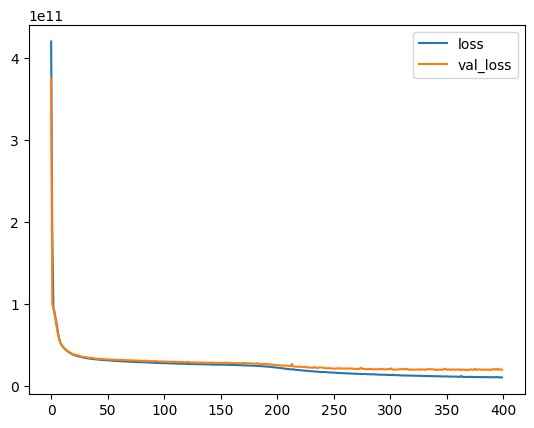

In [ ]:
losses = pd.DataFrame(model1.history.history)
losses.plot()

In [ ]:
model1.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 152)               3040      
                                                                 
 dense_30 (Dense)            (None, 114)               17442     
                                                                 
 dense_31 (Dense)            (None, 76)                8740      
                                                                 
 dense_32 (Dense)            (None, 19)                1463      
                                                                 
 dense_33 (Dense)            (None, 1)                 20        
                                                                 
Total params: 30705 (119.94 KB)
Trainable params: 30705 (119.94 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Evaluation on Test Data

https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

Scikit-Learn has metrics to evaluate the performance.

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

#### Next, we will test the performance of our model by predicting on test dataset X_test.

In [ ]:
# Your code to print X_test and see how test data looks like.
print(X_test.shape)
print(X_test)


(4323, 19)
[[0.09090909 0.125      0.04301887 ... 0.00863458 0.27272727 1.        ]
 [0.09090909 0.3125     0.09886792 ... 0.00185907 0.09090909 1.        ]
 [0.12121212 0.3125     0.09735849 ... 0.01066866 1.         0.        ]
 ...
 [0.09090909 0.25       0.08       ... 0.01239557 0.81818182 0.        ]
 [0.09090909 0.25       0.09962264 ... 0.01116512 0.63636364 0.        ]
 [0.09090909 0.25       0.0890566  ... 0.01218127 0.36363636 1.        ]]


# Following you will predict the output based on the input data X_test.

Lonk to API - https://keras.io/api/models/model_training_apis/#predict-method

In [ ]:
# Your code to make a predictions using (model.predict (<input_data>) method ).
# Store the predictions in the variable predictions
predictions = model1.predict(X_test)

136/136 [==============================] - 0s 807us/step


## Following code will test the error in the predicted values.
## Error is the difference between the predictions you made and real values (y_test)

In [ ]:
print (mean_absolute_error(y_test, predictions ))
print (np.sqrt(mean_squared_error(y_test,predictions))) # There is an error in this line. Fix the error.
print (explained_variance_score(y_test,predictions))

72490.65422594264
140237.28391461322
0.8529085569344989


The following code plots the predicted values in a scatter plot. We have also plotted the perfect predictions.

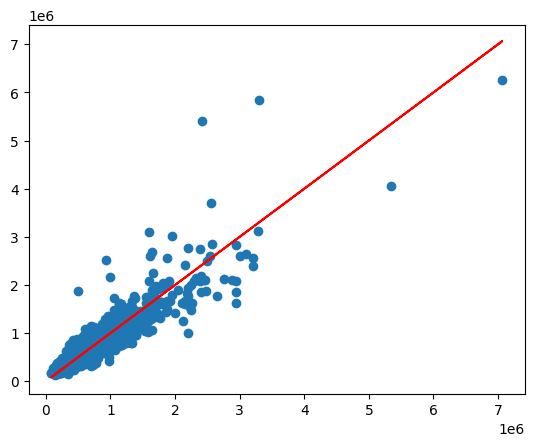

In [ ]:
# Our predictions
plt.scatter(y_test, predictions)

# Perfect predictions
plt.plot(y_test, y_test, 'r')

In the following code, we have plotted the error i.e. the difference between the actual and predicted values.

<Axes: ylabel='Density'>

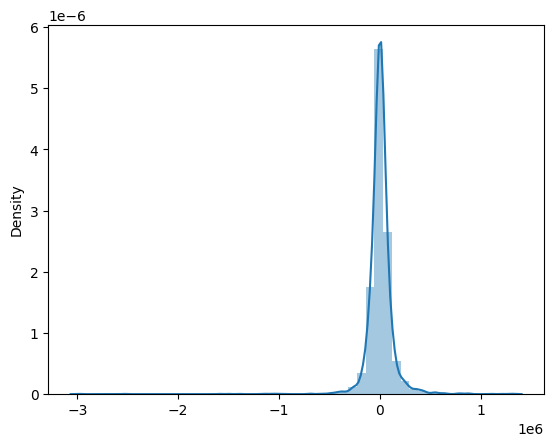

In [ ]:
errors = y_test.values.reshape(4323, 1) - predictions
sns.distplot(errors)


### Following code makes prediction on a brand new house. Comment each line of the code.

Try predicting price for a new home.

In [ ]:
single_house = df.drop('price',axis=1).iloc[0]

In [ ]:
single_house = scaler.transform(single_house.values.reshape(-1, 19))

In [ ]:
single_house

array([[0.03030303, 0.        , 0.02867925, 0.03681006, 0.        ,
        0.        , 0.        , 0.5       , 0.16666667, 0.04166667,
        0.        , 0.57391304, 0.        , 0.16901181, 0.50913621,
        0.13095853, 0.07540387, 0.09090909, 1.        ]])

In [ ]:
model1.predict(single_house)

1/1 [==============================] - 0s 16ms/step


array([[251556.11]], dtype=float32)

In [ ]:
df.iloc[0]

price            75000.0000
bedrooms             1.0000
bathrooms            0.0000
sqft_living        670.0000
sqft_lot         43377.0000
floors               1.0000
waterfront           0.0000
view                 0.0000
condition            3.0000
grade                3.0000
sqft_above         670.0000
sqft_basement        0.0000
yr_built          1966.0000
yr_renovated         0.0000
lat                 47.2638
long              -121.9060
sqft_living15     1160.0000
sqft_lot15       42882.0000
month                2.0000
year              2015.0000
Name: 1149, dtype: float64

In [ ]:
# The prediction result:

err = int(model1.predict(single_house)) - df['price'].iloc[0]

print( 'absolute prediction error = ', err, ' $')
print( 'relative prediction error = ', err / df['price'].iloc[0] *100 , ' %')

1/1 [==============================] - 0s 28ms/step
absolute prediction error =  176556.0  $
relative prediction error =  235.40800000000002  %


# Lab Logbook requirement:

# Please record the plot of the  model's  loss after every epoch and a summary in lab logbook. You can obtain the model summary using the model.summary() method. The API for obtaining the model summary is defined in the following link:


# https://keras.io/api/models/model/#summary-method


# Ensure that no code or other information is added to the logbook and that only required information is present.  Marks will not be awarded if anything else is found in the logbook or instructions are not clearly followed.







## Try different optimisations like changing model architecture, activation functions, training parameters.